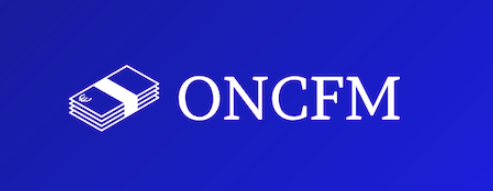

## Librairies de calcul

In [1]:
# Librairies de calcul
import pandas as pd
import numpy as np

#les packages de visualisation
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt

# import de models
import statsmodels.formula.api as smf
from scipy.stats import t, shapiro
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.stats.diagnostic import het_breuschpagan
import statsmodels
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

#importer les packages de pr√©paration de donn√©es
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
#importer les packages de clustering
from sklearn.cluster import KMeans, AgglomerativeClustering
from scipy.cluster.hierarchy import linkage, fcluster
from sklearn.decomposition import PCA
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import roc_curve

from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, auc

# Suppr√©ssion des avertissements
import warnings
warnings.filterwarnings("ignore", category=UserWarning)
warnings.simplefilter(action='ignore', category=FutureWarning)

## Importation des fichiers

#### Fichier de d√©monstration finale

In [2]:
# import du fichier de d√©monstration finale
billets_pro = pd.read_csv("billets_production.csv")
billets_pro.head()

diagonal  height_left  height_right  margin_low  margin_up  length   id
0    171.76       104.01        103.54        5.21       3.30  111.42  A_1
1    171.87       104.17        104.13        6.00       3.31  112.09  A_2
2    172.00       104.58        104.29        4.99       3.39  111.57  A_3
3    172.49       104.55        104.34        4.44       3.03  113.20  A_4
4    171.65       103.63        103.56        3.77       3.16  113.33  A_5

### Fichier de travail

In [3]:
# import du fichier
billets = pd.read_csv("billets.csv", sep=';')
billets.head()

is_genuine  diagonal  height_left  height_right  margin_low  margin_up  \
0        True    171.81       104.86        104.95        4.52       2.89   
1        True    171.46       103.36        103.66        3.77       2.99   
2        True    172.69       104.48        103.50        4.40       2.94   
3        True    171.36       103.91        103.94        3.62       3.01   
4        True    171.73       104.28        103.46        4.04       3.48   

   length  
0  112.83  
1  113.09  
2  113.16  
3  113.51  
4  112.54

# Importation des donn√©es

Nous disposons actuellement de six informations g√©om√©triques sur un billet :

- length : la longueur du billet (en mm)  
- height_left : la hauteur du billet (mesur√©e sur le c√¥t√© gauche, en mm)   
- height_right : la hauteur du billet (mesur√©e sur le c√¥t√© droit, en mm)   
- margin_up : la marge entre le bord sup√©rieur du billet et l'image de celui-ci (en mm)  
- margin_low : la marge entre le bord inf√©rieur du billet et l'image de celui-ci (en mm)   
- diagonal : la diagonale du billet (en mm)

In [4]:
# import du fichier avec s√©parateur de colonnes 
billets = pd.read_csv("billets.csv", sep = ';')
billets.head()

is_genuine  diagonal  height_left  height_right  margin_low  margin_up  \
0        True    171.81       104.86        104.95        4.52       2.89   
1        True    171.46       103.36        103.66        3.77       2.99   
2        True    172.69       104.48        103.50        4.40       2.94   
3        True    171.36       103.91        103.94        3.62       3.01   
4        True    171.73       104.28        103.46        4.04       3.48   

   length  
0  112.83  
1  113.09  
2  113.16  
3  113.51  
4  112.54

In [5]:
# Voir les statistiques diverses du dataFrame 
billets.describe(include="all")

is_genuine     diagonal  height_left  height_right   margin_low  \
count        1500  1500.000000  1500.000000   1500.000000  1463.000000   
unique          2          NaN          NaN           NaN          NaN   
top          True          NaN          NaN           NaN          NaN   
freq         1000          NaN          NaN           NaN          NaN   
mean          NaN   171.958440   104.029533    103.920307     4.485967   
std           NaN     0.305195     0.299462      0.325627     0.663813   
min           NaN   171.040000   103.140000    102.820000     2.980000   
25%           NaN   171.750000   103.820000    103.710000     4.015000   
50%           NaN   171.960000   104.040000    103.920000     4.310000   
75%           NaN   172.170000   104.230000    104.150000     4.870000   
max           NaN   173.010000   104.880000    104.950000     6.900000   

          margin_up      length  
count   1500.000000  1500.00000  
unique          NaN         NaN  
top             NaN         NaN  
freq            NaN         NaN  
mean       3.151473   112.67850  
std        0.231813     0.87273  
min        2.270000   109.49000  
25%        2.990000   112.03000  
50%        3.140000   112.96000  
75%        3.310000   113.34000  
max        3.910000   114.44000

La colonne `margin_low` ne contient pas le meme nombre d'√©l√©ments.

In [6]:
# Obtenir les d√©tails essentiels sur notre dataFrame
billets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   is_genuine    1500 non-null   bool   
 1   diagonal      1500 non-null   float64
 2   height_left   1500 non-null   float64
 3   height_right  1500 non-null   float64
 4   margin_low    1463 non-null   float64
 5   margin_up     1500 non-null   float64
 6   length        1500 non-null   float64
dtypes: bool(1), float64(6)
memory usage: 71.9 KB


In [7]:
# Obtenir le nombre de lignes et le nombre de colonnes
billets.shape

(1500, 7)

Le nombre de ligne est 1500, except√© `margin_low` qui manque 37 √©l√©ments.

### V√©rification des valeurs manquantes 

In [8]:
# V√©rification des doublons dans toutes les colonnes
billets.duplicated().sum()

0

In [9]:
# V√©rification des valeurs manquantes
billets.isna().sum()

is_genuine       0
diagonal         0
height_left      0
height_right     0
margin_low      37
margin_up        0
length           0
dtype: int64

La colonne `margin_low` comprend 37 √©l√©ments manquants.

In [10]:
# V√©rufucation d'un value count sur 'is_genuine'
billets.value_counts()

is_genuine  diagonal  height_left  height_right  margin_low  margin_up  length
False       171.04    104.23       104.22        4.87        3.56       111.54    1
True        171.99    103.97       103.89        4.22        3.17       113.12    1
                      103.90       104.21        4.18        3.07       113.01    1
                      103.79       103.90        4.62        2.90       112.92    1
                      103.75       104.14        4.19        2.82       112.83    1
                                                                                 ..
False       172.55    104.25       104.23        5.60        3.13       111.72    1
            172.52    104.48       104.17        5.16        3.39       110.71    1
                      104.11       104.35        5.30        3.31       111.55    1
            172.51    104.43       104.17        5.11        3.08       111.70    1
True        172.92    103.55       103.94        4.78        3.27       113.55   

value count permet de lister les valeurs diff√©rentes de la colonne pour laquelle on a group√© les √©l√©ments et indique √©galement le nombre d'occurrences de chaque √©l√©ment.

In [11]:
# Calcul de correlations
billets.corr()

is_genuine  diagonal  height_left  height_right  margin_low  \
is_genuine      1.000000  0.132756    -0.379833     -0.485092   -0.783032   
diagonal        0.132756  1.000000     0.019472     -0.024492   -0.111534   
height_left    -0.379833  0.019472     1.000000      0.242279    0.302643   
height_right   -0.485092 -0.024492     0.242279      1.000000    0.391085   
margin_low     -0.783032 -0.111534     0.302643      0.391085    1.000000   
margin_up      -0.606262 -0.055649     0.246522      0.307005    0.431606   
length          0.849285  0.097587    -0.320863     -0.401751   -0.666753   

              margin_up    length  
is_genuine    -0.606262  0.849285  
diagonal      -0.055649  0.097587  
height_left    0.246522 -0.320863  
height_right   0.307005 -0.401751  
margin_low     0.431606 -0.666753  
margin_up      1.000000 -0.520575  
length        -0.520575  1.000000

Text(0.5, 1.0, 'corr√©lations des variables')

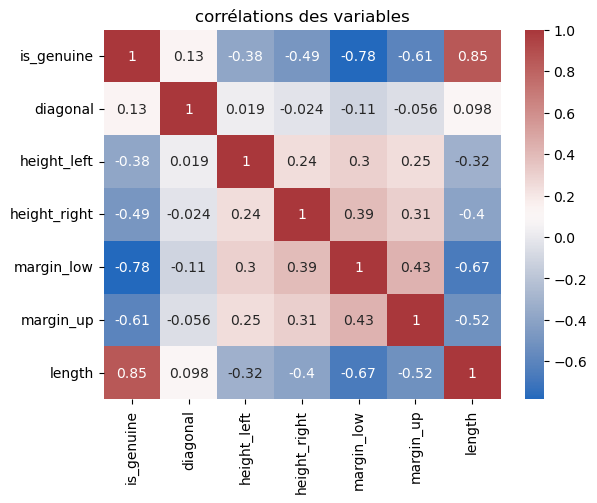

In [12]:
# Heatmap de correlations pour plus de lisibilit√©

sns.heatmap(billets.corr(), cmap="vlag", annot=True).set_title('corr√©lations des variables')

## V√©rification des corr√©lation entre les variables

- is_genuine est tr√©s fortement corr√©l√© √† `Lenght`.  
- is_genuine est tr√©s fortement n√©gativement corr√©l√© √† `magin_low`

## Comparaison de la taille des billets (Boxplot)

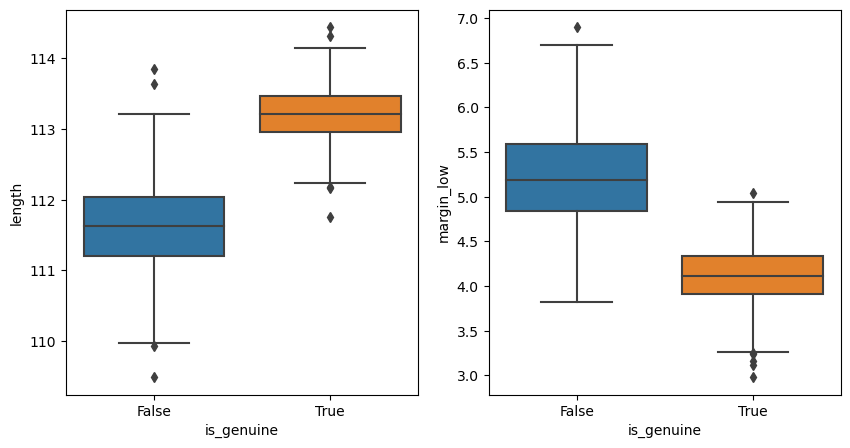

In [13]:
# box plot sur df billets
fig, ax = plt.subplots(1,2, figsize=(10,5))
sns.boxplot(x="is_genuine", y="length", data=billets,ax=ax[0])
sns.boxplot(x='is_genuine', y='margin_low',data=billets, ax=ax[1])

plt.show()

- Les vrais billets semblent etre plus long (`Lenght`).  
- Les faux billets ont une marge inf√©rieures plus longues (`margin_low`).

## Corr√©lation par type de billet (Pairplot)

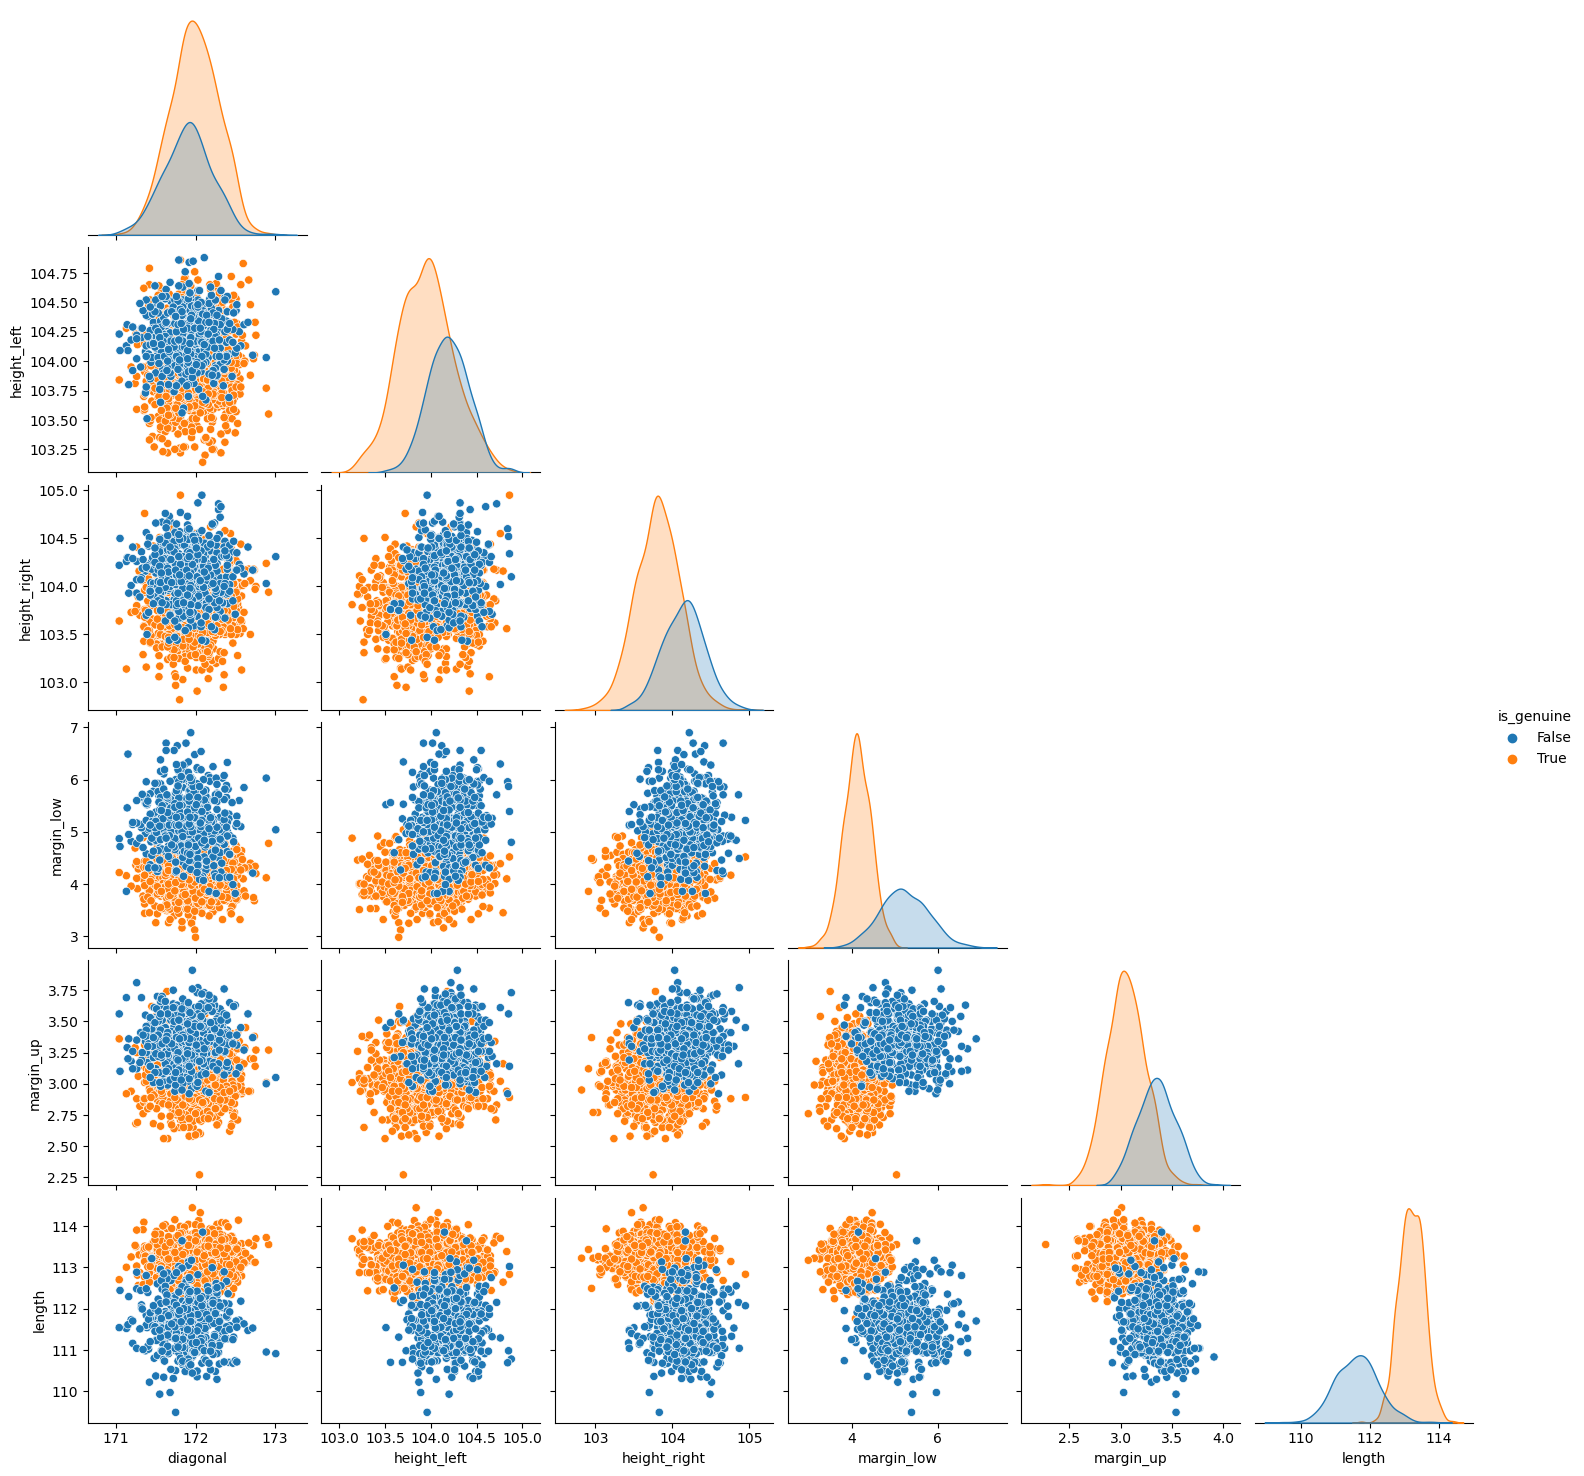

In [14]:
# pairplot sur billets
sns.pairplot(billets,hue='is_genuine',corner=True)

**Les vrais et faux billets se confondent, on le voit avec la superposition de chacune des repr√©sentations graphiques. Il y a peut etre des valeurs suspectes √† verifier.**

## R√©partition des billets par nature (Pie chart)

In [15]:
# Piechart de la r√©partition
fig = px.pie(billets, names = 'is_genuine', title = "R√©partion des billets")
fig.update_traces(textinfo='value+label+percent', textfont_size=20)
fig.show("notebook_connected")

## Dissociation du df en deux parties

### Dataframe des valeurs manquantes

In [16]:
# Cr√©ation du df uniquement avec valeurs manquantes
billets_nan = billets[billets.isnull().any(axis=1)]
billets_nan.shape

(37, 7)

### Dataframe sans valeurs manquantes

In [17]:
# Cr√©ation du df sans valeurs manquantes
billets_withoutnan = billets.dropna(how='any')
billets_withoutnan.shape

(1463, 7)

In [18]:
# V√©rifications du df
billets_withoutnan.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1463 entries, 0 to 1499
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   is_genuine    1463 non-null   bool   
 1   diagonal      1463 non-null   float64
 2   height_left   1463 non-null   float64
 3   height_right  1463 non-null   float64
 4   margin_low    1463 non-null   float64
 5   margin_up     1463 non-null   float64
 6   length        1463 non-null   float64
dtypes: bool(1), float64(6)
memory usage: 81.4 KB


# R√©gr√©ssion lin√©aire multiple

In [9]:
# Permet de mod√©liser la relation entre une variable d√©pendante et plusieurs variables ind√©pendantes. 

In [10]:
# L'objectif est de minimiser la somme des carr√©s des r√©sidus pour estimer les coefficients 
# et mod√©liser la relation entre les variables.

In [19]:
#Regression lin√©aire multiple 
reg_multi = smf.ols('margin_low~is_genuine+diagonal+height_left+height_right+margin_up+length', data=billets_withoutnan).fit()
print(reg_multi.summary())

                            OLS Regression Results                            
Dep. Variable:             margin_low   R-squared:                       0.617
Model:                            OLS   Adj. R-squared:                  0.615
Method:                 Least Squares   F-statistic:                     390.7
Date:                Sun, 31 Dec 2023   Prob (F-statistic):          4.75e-299
Time:                        11:54:54   Log-Likelihood:                -774.14
No. Observations:                1463   AIC:                             1562.
Df Residuals:                    1456   BIC:                             1599.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept              2.8668      8

### Suppr√©ssion des variables non significatives

On constate ici que certains param√®tres ne sont pas significativement diff√©rents de 0, car leur p-valeur n'est pas inf√©rieure √† 5 %, le niveau de test que nous souhaitons.

Le ùëÖ2 vaut environ 0.62, et le ùëÖ2 ajust√© est d'environ 0.61.

Cette valeur est plus √©lev√©e qu'en r√©gression lin√©aire simple, et c'est logique, car lorsque l'on rajoute des variables explicatives potentielles, on accro√Æt naturellement la valeur de ces ùëÖ2 

##### Les variables selon leurs p-valeur  qui vont √™tre retir√©es

- length 0.868  
- diagonal 0.716  
- height_right 0.484  
- height_left 0.468

In [20]:
# Suppr√©ssion des variables non significatives            
reg_multi = smf.ols('margin_low~is_genuine+margin_up', data=billets_withoutnan).fit()
print(reg_multi.summary())

                            OLS Regression Results                            
Dep. Variable:             margin_low   R-squared:                       0.617
Model:                            OLS   Adj. R-squared:                  0.616
Method:                 Least Squares   F-statistic:                     1174.
Date:                Sun, 31 Dec 2023   Prob (F-statistic):          1.24e-304
Time:                        11:54:54   Log-Likelihood:                -774.73
No. Observations:                1463   AIC:                             1555.
Df Residuals:                    1460   BIC:                             1571.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept              5.9263      0

**On remarque qu'√† pr√©sent, tous les param√®tres sont significatifs. Quant au ùëÖ2 , il vaut environ 0.617, tout comme le ùëÖ2 ajust√©.**

**On peut donc utiliser ce mod√®le √† des fins de pr√©vision.**

In [149]:
# Un R2 de 0.617 signifie que le mod√®le explique environ 62% de la variabilit√© de la variable d√©pendante par les variables
# ind√©pendantes incluses dans le mod√®le. 
# En d'autres termes, environ 62% de la variation dans la variable que vous essayez de pr√©dire est captur√©e par votre mod√®le.
# Pour interpr√©ter cela, on peut dire que c'est un R2 relativement √©lev√©.

## R√©sultat d'analyse

Nous allons ici r√©aliser les tests √† un niveau $\alpha=5$% :

In [21]:
# tests a univeau de  ùõº = 5%
alpha = 0.05

# Number of individuals
n = billets_withoutnan['margin_low'].count()

# Number of variables
p = 3

analysis = pd.DataFrame({'obs':np.arange(1, n+1)})

R√©cup√©rons $n$, le nombre d'individus de l'√©chantillon, et $p$, le nombre de variables.

Nous allons mener des analyses sur les valeurs atypiques et/ou influentes en travaillant sur un dataframe appel√©  analyses.

In [22]:
analyses = pd.DataFrame({'obs':np.arange(1, n+1)})
#analyses['obs'].astype('float', inplace=True)

## Calculez les leviers  
  
  
L'effet de levier est une mesure de la distance qui s√©pare les valeurs des variables ind√©pendantes d'une observation de celles des autres observations.   
  
  
On peut calculer les leviers comme ceci, en sachant que le seuil des leviers est de $2‚àó\frac{p}{n}$.

In [150]:
# Le calcul des leviers permet d'identifier les facteurs cl√©s qui influent le plus sur un r√©sultat. 
# afin d'am√©liorer la performance globale et prendre des d√©cisions plus √©clair√©es.

In [23]:
# Calcul des leviers
analyses['levier'] = reg_multi.get_influence().hat_matrix_diag

seuil_levier = 2*p/n

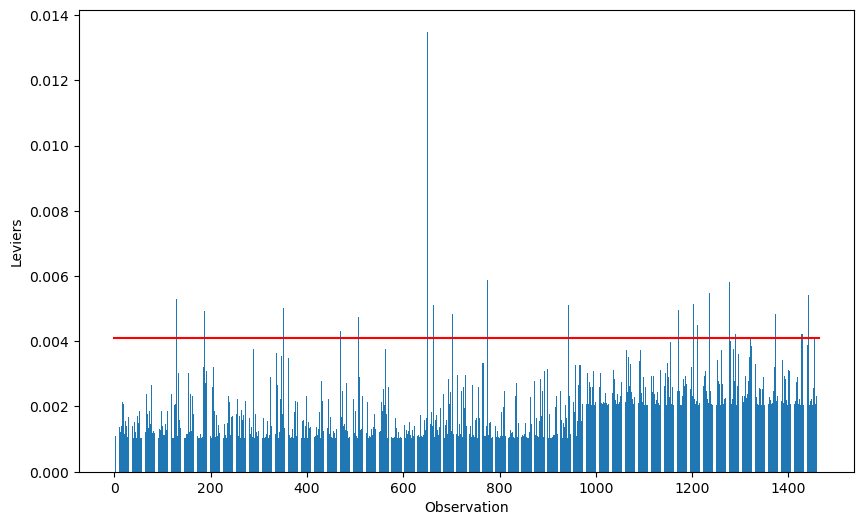

In [24]:
# graphique des leviers
plt.figure(figsize=(10,6))
plt.bar(analyses['obs'], analyses['levier'])
plt.xticks(np.arange(0, 1463, step=200))
plt.xlabel('Observation')
plt.ylabel('Leviers')
plt.plot([0, 1463], [seuil_levier, seuil_levier], color='r')
plt.show()

In [1]:
# Avec un seuil de levier fix√© √† 0.004 nous voyont apparaitre des outliers.

Pour s√©lectionner les points pour lesquels le levier est sup√©rieur au seuil, on ex√©cute la ligne suivante :

In [25]:
# seuil des leviers
analyses.loc[analyses['levier'] > seuil_levier, :]

obs    levier
4        5  0.004748
48      49  0.007353
52      53  0.010647
54      55  0.004408
123    124  0.005865
...    ...       ...
1441  1442  0.005428
1442  1443  0.004406
1444  1445  0.004648
1446  1447  0.004796
1453  1454  0.004136

[67 rows x 2 columns]

## Les r√©sidus studentis√©s
  
Les r√©sidus studentis√©s sont une mesure importante pour √©valuer la qualit√© d'ajustement d'un mod√®le statistique et identifier les observations qui pourraient avoir un impact disproportionn√© sur les r√©sultats.  
  
Si l'on souhaite maintenant calculer les r√©sidus studentis√©s, nous √©crivons ceci, sachant que le seuil pour les r√©sidus studentis√©s est une loi de Student √† n-p-1 degr√©s de libert√© :

In [151]:
# Les r√©sidus studentis√©s sont des r√©sidus ajust√©s pour prendre en compte la variabilit√© des donn√©es. 
# Ils sont utiles dans l'analyse de r√©gression pour d√©tecter les observations influentes et √©valuer la validit√© des hypoth√®ses
# du mod√®le, telle que la normalit√© des r√©sidus. 
# Les r√©sidus studentis√©s sont obtenus en divisant les r√©sidus bruts par leur √©cart type estim√©, 
# ce qui les standardise. 
# Ils sont souvent utilis√©s avec un seuil de 2 en valeur absolue pour identifier les observations potentiellement influentes.

In [26]:
# Analyses des r√©sidus
analyses['rstudent'] = reg_multi.get_influence().resid_studentized_internal
seuil_rstudent = t.ppf(1-alpha/2,n-p-1)

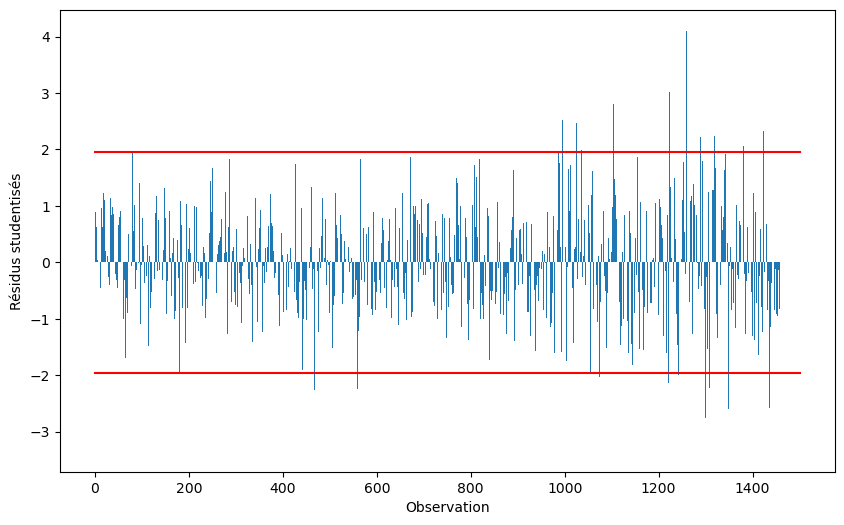

In [27]:
# graphiques des r√©sidus
plt.figure(figsize=(10,6))
plt.bar(analyses['obs'], analyses['rstudent'])
plt.xticks(np.arange(0, 1500, step=200))
plt.xlabel('Observation')
plt.ylabel('R√©sidus studentis√©s')
plt.plot([0, 1500], [seuil_rstudent, seuil_rstudent], color='r')
plt.plot([0, 1500], [-seuil_rstudent, -seuil_rstudent], color='r')
plt.show()

## D√©terminez la distance de Cook  

In [152]:
# La distance de Cook est une mesure utilis√©e en analyse de r√©gression 
# pour √©valuer l'influence de chaque observation sur les r√©sultats du mod√®le. 
# Elle mesure √† quel point les estimations des coefficients seraient modifi√©es si une observation √©tait exclue du mod√®le. 
# Une distance de Cook √©lev√©e indique une influence significative de l'observation sur le mod√®le.

In [28]:
# Calcul de la distance de cook
influence = reg_multi.get_influence().summary_frame()

Le seuil de la distance de Cook est de n-p. 

In [29]:
# Analyses de la distance de cook
analyses['dcooks'] = influence['cooks_d']
seuil_dcook = 4/(n-p)

On peut d√©tecter les observations influentes comme ceci :

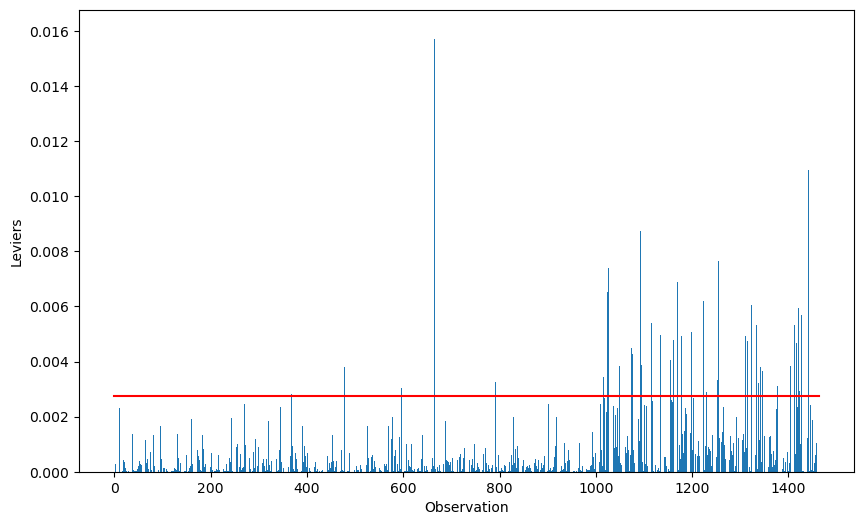

In [30]:
# Graphique de cook
plt.figure(figsize=(10,6))
plt.bar(analyses['obs'], analyses['dcooks'])
plt.xticks(np.arange(0, 1463, step=200))
plt.xlabel('Observation')
plt.ylabel('Leviers')
plt.plot([0, 1463], [seuil_dcook, seuil_dcook], color='r')
plt.show()

## V√©rifier la colin√©arit√© des variables  
  
La colin√©arit√© se produit lorsque l'une des variables ind√©pendantes peut √™tre pr√©dite de mani√®re lin√©aire √† partir d'une combinaison lin√©aire des autres variables ind√©pendantes.  
Cela peut causer des probl√®mes dans l'analyse de r√©gression et affecter l'interpr√©tation des coefficient.  

Une autre chose √† v√©rifier est l'√©ventuelle colin√©arit√© approch√©e des variables :

In [31]:
# Calcul des variable de colinarit√©
variables = reg_multi.model.exog
[variance_inflation_factor(variables, i) for i in np.arange(1,variables.shape[1])]

[1.5938854494007753, 1.5938854494007748]

Ici, tous les coefficients sont inf√©rieurs √† 10, il n'y a donc pas de probl√®me de colin√©arit√©.  
Nous appelont cela une colin√©arit√© quasi-parfaite.

## Tests d‚Äôhomosc√©dasticit√©  

In [153]:
# On se r√©f√®re √† l'id√©e que la variance des r√©sidus d'un mod√®le de r√©gression est constante 
# pour toutes les valeurs de la variable d√©pendante. En d'autres termes,
# l'√©cart-type des r√©sidus devrait √™tre constant √† tous les niveaux de la variable pr√©dite.

Pour diagnostiquer l'homosc√©dasticit√©, on peut effectuer des analyses graphiques ou statistiques, telles que :

**Graphiques de r√©sidus :** Repr√©senter graphiquement les r√©sidus par rapport √† la variable pr√©dite. Un sch√©ma r√©gulier dans la dispersion des r√©sidus peut indiquer une violation de l'homosc√©dasticit√©.

**Test de Breusch-Pagan :** Ce test statistique peut √™tre utilis√© pour formellement √©valuer l'homosc√©dasticit√©.  
Il teste l'hypoth√®se nulle selon laquelle la variance des r√©sidus est constante.

In [3]:
# Si p-value ‚â§ 0,05 :   
# On rejette l'hypoth√®se nulle, indiquant une violation de l'homosc√©dasticit√© (pr√©sence d'h√©t√©rosc√©dasticit√©).  

# Si p-value > 0,05 :   
# On ne peut pas rejeter l'hypoth√®se nulle, sugg√©rant que l'homosc√©dasticit√© peut √™tre consid√©r√©e comme pr√©sente.

In [32]:
# r√©sultat du test de Breusch Pagan
_, pval, __, f_pval = statsmodels.stats.diagnostic.het_breuschpagan(reg_multi.resid, variables)
print('p value test Breusch Pagan:', pval)

p value test Breusch Pagan: 3.2033559115838186e-36


In [4]:
# p-value > 0,05 :   
# On ne peut pas rejeter l'hypoth√®se nulle, sugg√©rant que l'homosc√©dasticit√© peut √™tre consid√©r√©e comme pr√©sente.

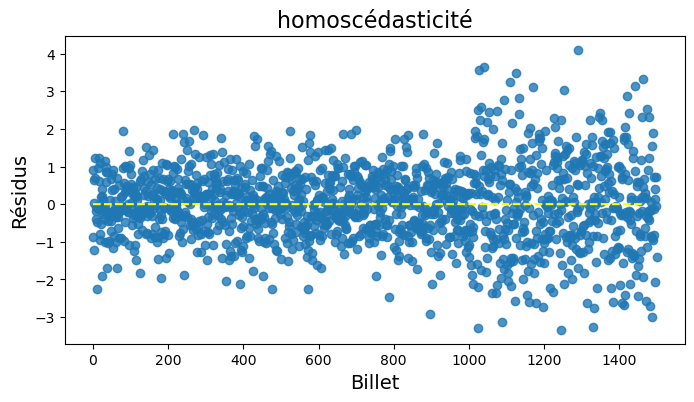

In [33]:
# Plotting the residuals
plt.subplots(figsize=(8, 4))
plt.scatter(x=billets_withoutnan.index, y=analyses['rstudent'], alpha=0.8)
plt.plot(np.repeat(0, len(billets_withoutnan.index)+2), color='yellow', linestyle='--')

plt.ylabel('R√©sidus', fontsize=14)
plt.xlabel('Billet', fontsize=14)
plt.title('homosc√©dasticit√©', fontsize=16)
plt.show()

La p-valeur ici n'est pas inf√©rieure √† $5$%, on ne rejette pas l'hypoth√®se $H0$ selon laquelle les variances sont constantes (l'hypoth√®se d‚Äôhomosc√©dasticit√©).

## Testez la normalit√© des r√©sidus

Si l'on veut tester la normalit√© des r√©sidus, on peut faire un test de Shapiro-Wilk.  

On analyse la distribution des r√©sidus avec un test de normalit√© et on calcul sa moyenne

In [34]:
# test de Shapiro
shapiro(reg_multi.resid)

ShapiroResult(statistic=0.9936248064041138, pvalue=6.20942773821298e-06)

In [6]:
# Plus la statistique de test est proche de 1, plus les donn√©es sont conformes √† une distribution normale. 
# Dans notre cas, 0.9936 indique une certaine proximit√© avec une distribution normale.

# si la p-value est inf√©rieure √† un seuil de signification (par exemple, 0.05), on rejette l'hypoth√®se nulle.

**En r√©sum√©, les r√©sultats sugg√®rent que les donn√©es ne suivent pas une distribution normale.  
Cependant, il est important de noter que le rejet de l'hypoth√®se de normalit√©**

In [35]:
print('Moyenne des r√©sidus',reg_multi.resid.mean())

Moyenne des r√©sidus 1.7223254796235512e-15


Le test nous indique que les r√©sidus ne suivent pas une loi normale.  
pvalue < 0.05

In [36]:
# Analyses des r√©sidus
analyses['residu_s'] = reg_multi.resid

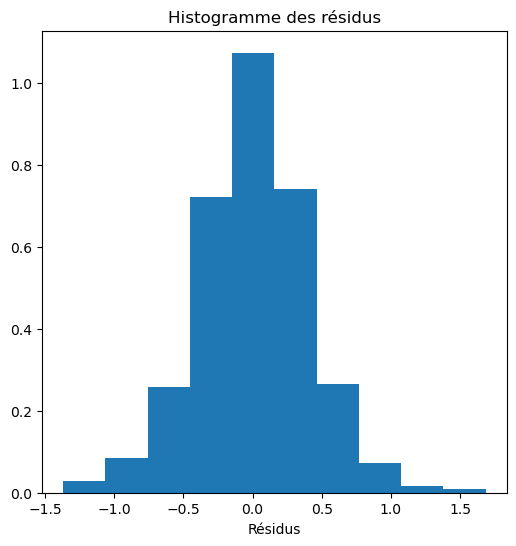

In [37]:
# Historigramme des r√©sidus
plt.figure(figsize=(6,6))
plt.hist(analyses['residu_s'], density=True)
plt.xlabel('R√©sidus')
plt.title('Histogramme des r√©sidus')
plt.show()

### QQ plot ou quantile-quantile plot ( diagramme quantile-quantile)  

In [7]:
# Un QQ plot (Quantile-Quantile plot) permet de comparer visuellement la distribution des donn√©es
# √† une distribution th√©orique, souvent la distribution normale.

In [38]:
import statsmodels.api as sm

<Figure size 800x800 with 0 Axes>

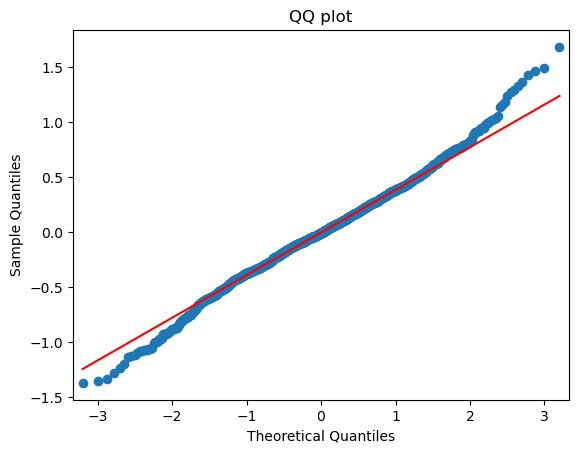

In [39]:
# Cr√©ation d'un QQ-plot
plt.figure(figsize=(8,8))
fig = sm.qqplot(reg_multi.resid, line='q')
plt.title('QQ plot')
plt.show()

In [8]:
# Les points align√©s le long de la diagonale sugg√®rent une bonne correspondance avec la distribution th√©orique.

**Malgr√© une homosc√©dasticit√©, le mod√®le lin√©aire est robuste et mon fichier contient plus de 30 individus.**

Sources :
http://perso.ens-lyon.fr/lise.vaudor/non-respect-des-hypotheses-du-modele-lineaire-anova-regression-cest-grave-docteur/

# Pr√©diction en appliquant la r√©gression lin√©aire mutliple

In [40]:
# df uniquement remplit de valeurs null
billets_nan.head()

is_genuine  diagonal  height_left  height_right  margin_low  margin_up  \
72         True    171.94       103.89        103.45         NaN       3.25   
99         True    171.93       104.07        104.18         NaN       3.14   
151        True    172.07       103.80        104.38         NaN       3.02   
197        True    171.45       103.66        103.80         NaN       3.62   
241        True    171.83       104.14        104.06         NaN       3.02   

     length  
72   112.79  
99   113.08  
151  112.93  
197  113.27  
241  112.36

In [41]:
# cr√©ation d'un df sans margin_low
X_nan = billets_nan.drop(['margin_low'], axis=1)

In [42]:
# cr√©ation d'un df de pr√©diction
y_nan = reg_multi.predict(X_nan)

In [43]:
# remplacement des valeurs nulls par la pr√©diction
X_nan['margin_low'] = y_nan
X_nan.head()

is_genuine  diagonal  height_left  height_right  margin_up  length  \
72         True    171.94       103.89        103.45       3.25  112.79   
99         True    171.93       104.07        104.18       3.14  113.08   
151        True    172.07       103.80        104.38       3.02  112.93   
197        True    171.45       103.66        103.80       3.62  113.27   
241        True    171.83       104.14        104.06       3.02  112.36   

     margin_low  
72     4.074248  
99     4.097561  
151    4.122994  
197    3.995830  
241    4.122994

In [44]:
# v√©rification des colonnes remplac√©es
X_nan.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 37 entries, 72 to 1438
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   is_genuine    37 non-null     bool   
 1   diagonal      37 non-null     float64
 2   height_left   37 non-null     float64
 3   height_right  37 non-null     float64
 4   margin_up     37 non-null     float64
 5   length        37 non-null     float64
 6   margin_low    37 non-null     float64
dtypes: bool(1), float64(6)
memory usage: 2.1 KB


In [45]:
# v√©rification du df sans les valeurs nulls
billets_withoutnan.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1463 entries, 0 to 1499
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   is_genuine    1463 non-null   bool   
 1   diagonal      1463 non-null   float64
 2   height_left   1463 non-null   float64
 3   height_right  1463 non-null   float64
 4   margin_low    1463 non-null   float64
 5   margin_up     1463 non-null   float64
 6   length        1463 non-null   float64
dtypes: bool(1), float64(6)
memory usage: 81.4 KB


In [46]:
# Ajouter les lignes qui ont remplac√© les valeurs nulles
billets = pd.concat([billets_withoutnan, X_nan])

In [47]:
# v√©rification du df apr√©s concat√©nation
billets.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1500 entries, 0 to 1438
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   is_genuine    1500 non-null   bool   
 1   diagonal      1500 non-null   float64
 2   height_left   1500 non-null   float64
 3   height_right  1500 non-null   float64
 4   margin_low    1500 non-null   float64
 5   margin_up     1500 non-null   float64
 6   length        1500 non-null   float64
dtypes: bool(1), float64(6)
memory usage: 83.5 KB


## analyse univari√©e

In [48]:
# Analyses des diff√©rences Faux et vrais billets
target = billets[['is_genuine']]

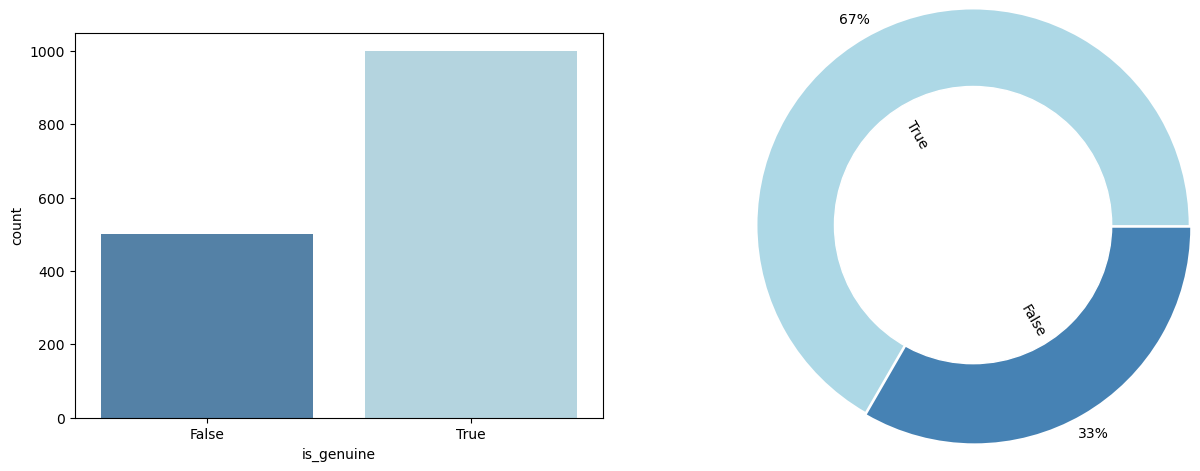

In [49]:
# Graphique pr√©sentant les diff√©rences
palette =["steelblue","lightblue",]
plt.figure(figsize=(15,5))
plt.subplot(121)
sns.countplot(x="is_genuine", data=target, palette = palette)
plt.subplot(122)
target["is_genuine"].value_counts().plot(kind="pie", ylabel='', 
                                       autopct='%1.0f%%', radius=1.4, 
                                       explode = (0, 0.02), 
                                       colors=["lightblue","steelblue"], 
                                       pctdistance=1.1, labeldistance=0.4, 
                                       rotatelabels=True)
circle = plt.Circle( (0,0), 0.9, color='white')
p = plt.gcf()
p.gca().add_artist(circle)

plt.show()

**Un tiers des billets sont faux.**

## Boxplot  avec les valeurs manquante remplac√©es

<Axes: xlabel='is_genuine', ylabel='margin_low'>

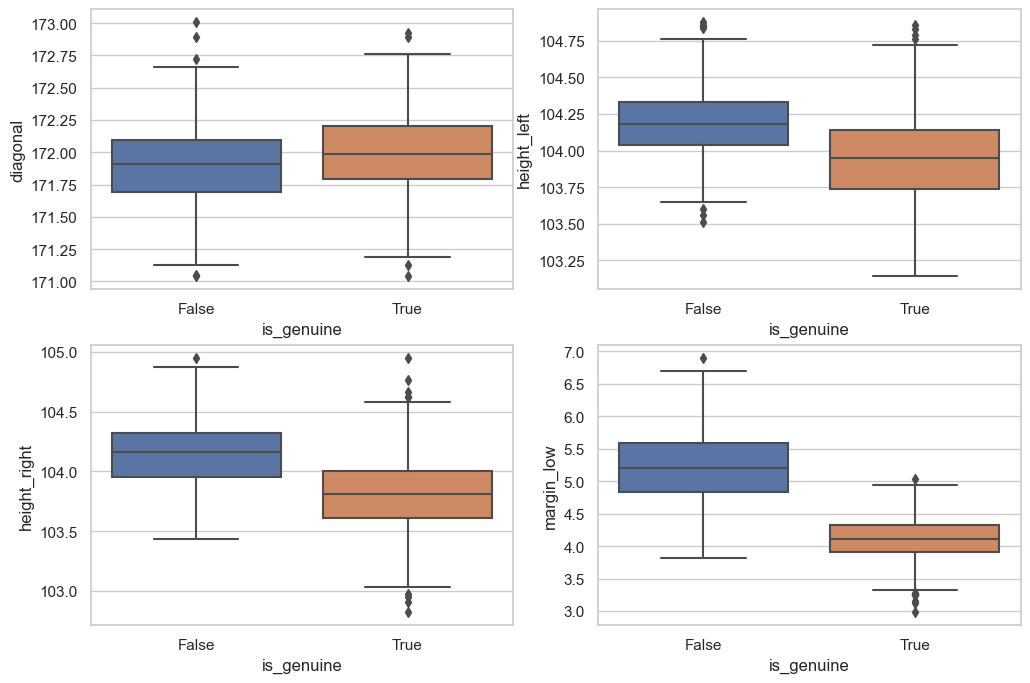

In [50]:
# Afficher des boxplot

plt.figure(figsize=(12, 8))
sns.set(style="whitegrid")
plt.subplot(221)
sns.boxplot(data=billets,y='diagonal',x='is_genuine')
plt.subplot(222)
sns.boxplot(data=billets, y='height_left',x='is_genuine')
plt.subplot(223)
sns.boxplot(data=billets, y='height_right',x='is_genuine')
plt.subplot(224)
sns.boxplot(data=billets,y='margin_low',x='is_genuine')

<Axes: xlabel='is_genuine', ylabel='length'>

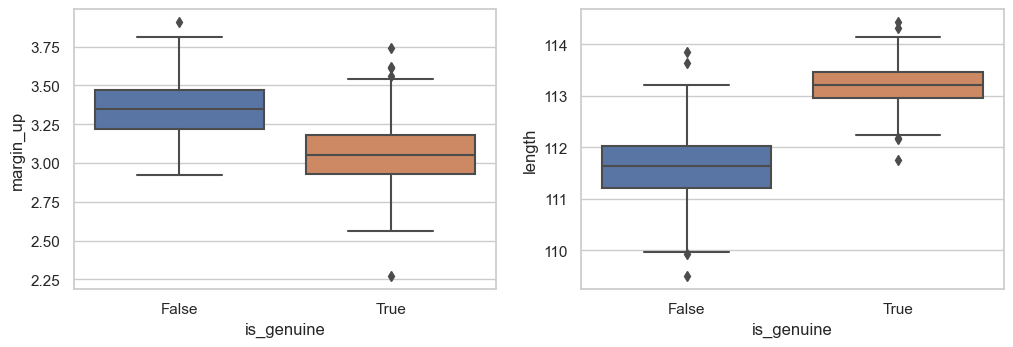

In [51]:
plt.figure(figsize=(12, 8))
sns.set(style="whitegrid")
plt.subplot(221)
sns.boxplot(data=billets,  y='margin_up',x='is_genuine')
plt.subplot(222)
sns.boxplot(data=billets,  y='length',x='is_genuine')

## ACP (Analyse en composantes principales)  
On r√©alise une analyse en composantes principales pour r√©duire les 6 variables et repr√©senter nos billets dans un espace √† 2 dimensions.

### Pr√©paration des donn√©es pour l'ACP

In [52]:
# df sans is_genuine
X = billets.drop(columns= ['is_genuine'])
X.head()

diagonal  height_left  height_right  margin_low  margin_up  length
0    171.81       104.86        104.95        4.52       2.89  112.83
1    171.46       103.36        103.66        3.77       2.99  113.09
2    172.69       104.48        103.50        4.40       2.94  113.16
3    171.36       103.91        103.94        3.62       3.01  113.51
4    171.73       104.28        103.46        4.04       3.48  112.54

In [53]:
# df avec uniquement is_genuine
y = billets['is_genuine']
y.head()

0    True
1    True
2    True
3    True
4    True
Name: is_genuine, dtype: bool

In [54]:
# Centrage et R√©duction
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled

array([[-0.48653957,  2.77412327,  3.16324041,  0.0562999 , -1.128325  ,
         0.17365114],
       [-1.63372936, -2.23653528, -0.79966777, -1.08070259, -0.69679916,
         0.47166629],
       [ 2.3978233 ,  1.50475644, -1.29119126, -0.1256205 , -0.91256208,
         0.55190114],
       ...,
       [-0.78153123,  1.43794766,  0.61346228,  1.02828427,  1.97866106,
        -2.71480344],
       [ 2.29949275,  1.00369058,  1.50434862,  1.04434939,  1.76289814,
        -1.38519737],
       [-0.19154792,  0.83666863,  1.135706  ,  1.14716614,  0.38201544,
        -1.36227312]])

### Calcul des composantes principales

In [55]:
# Nombre de composantes souhait√©es
n_comp = 6

# Calcul des composantes principales
pca = PCA(n_components=n_comp)
pca.fit(X_scaled)

PCA(n_components=6)

In [56]:
# D√©finition de la fonction pour le graphique √âboulis des valeurs propres
def display_scree_plot(pca):
    scree = pca.explained_variance_ratio_*100
    plt.bar(np.arange(len(scree))+1, scree)
    plt.plot(np.arange(len(scree))+1, scree.cumsum(), c="red", marker='o')
    plt.xlabel("rang de l'axe d'inertie")
    plt.ylabel("pourcentage d'inertie(%)")
    plt.title("√âboulis des valeurs propres")
    plt.show(block=False)

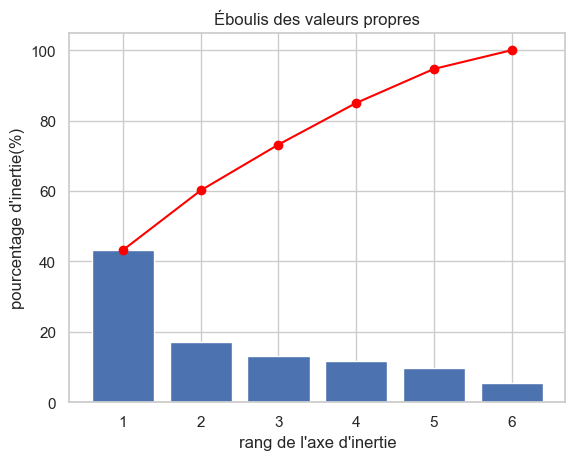

In [57]:
# graphique de l'√©boulis des valeurs propres
display_scree_plot(pca)
plt.show()

Je choisis 2 composantes principales, car les 2 premi√®res dimensions repr√©sentent 60% des informations importantes.On va s'int√©resser aux axes F1 et F2.

### Cercle des corr√©lations 

In [58]:
# D√©finition de la fonction pour le graphique Cercle de corr√©lation
def display_circles(pcs, n_comp, pca, axis_ranks, labels=None, label_rotation=0, lims=None):
    for d1, d2 in axis_ranks:  # On affiche les 3 premiers plans factoriels, donc les 6 premi√®res composantes
        if d2 < n_comp:

            # initialisation de la figure
            fig, ax = plt.subplots(figsize=(10, 10))

            # d√©termination des limites du graphique
            if lims is not None:
                xmin, xmax, ymin, ymax = lims
            elif pcs.shape[1] < 30:
                xmin, xmax, ymin, ymax = -1, 1, -1, 1
            else:
                xmin, xmax, ymin, ymax = min(pcs[d1, :]), max(
                    pcs[d1, :]), min(pcs[d2, :]), max(pcs[d2, :])

            # affichage des fl√®ches
            # s'il y a plus de 30 fl√®ches, on n'affiche pas le triangle √† leur extr√©mit√©
            if pcs.shape[1] < 30:
                plt.quiver(np.zeros(pcs.shape[1]), np.zeros(pcs.shape[1]),
                           pcs[d1, :], pcs[d2, :],
                           angles='xy', scale_units='xy', scale=1, color="grey")
            else:
                lines = [[[0, 0], [x, y]] for x, y in pcs[[d1, d2]].T]
                ax.add_collection(LineCollection(
                    lines, axes=ax, alpha=.1, color='black'))

            # affichage des noms des variables
            if labels is not None:
                for i, (x, y) in enumerate(pcs[[d1, d2]].T):
                    if x >= xmin and x <= xmax and y >= ymin and y <= ymax:
                        plt.text(x, y, labels[i], fontsize='14', ha='center',
                                 va='center', rotation=label_rotation, color="blue", alpha=0.5)

            # affichage du cercle
            circle = plt.Circle((0, 0), 1, facecolor='none', edgecolor='b')
            plt.gca().add_artist(circle)

            # d√©finition des limites du graphique
            plt.xlim(xmin, xmax)
            plt.ylim(ymin, ymax)

            # affichage des lignes horizontales et verticales
            plt.plot([-1, 1], [0, 0], color='grey', ls='--')
            plt.plot([0, 0], [-1, 1], color='grey', ls='--')

            # nom des axes, avec le pourcentage d'inertie expliqu√©
            plt.xlabel('F{} ({}%)'.format(
                d1+1, round(100*pca.explained_variance_ratio_[d1], 1)))
            plt.ylabel('F{} ({}%)'.format(
                d2+1, round(100*pca.explained_variance_ratio_[d2], 1)))

            plt.title("Cercle des corr√©lations (F{} et F{})".format(d1+1, d2+1))
            plt.show(block=False)
def display_factorial_planes(X_projected, n_comp, pca, axis_ranks, labels=None, alpha=1, illustrative_var=None):
    '''
    Display a scatter plot on a factorial plane, one for each factorial plane

    Parameters :
        X_projected : model_pca.transform(X_scaled)
        n_comp (float) : the number of components
        pca : the result of instantiate of PCA in scikit learn
        axis_rank : the rank of the axis to visualize
        labels : labels of our variables
    '''
    # For each factorial plane
    for d1,d2 in axis_ranks:
        if d2 < n_comp:
 
            # Initialize the matplotlib figure      
            #fig = plt.figure(figsize=(7,6))
        
            # Display the points
            if illustrative_var is None:
                plt.scatter(X_projected[:, d1], X_projected[:, d2], alpha=alpha)
            else:
                illustrative_var = np.array(illustrative_var)
                for value in np.unique(illustrative_var):
                    selected = np.where(illustrative_var == value)
                    plt.scatter(X_projected[selected, d1], X_projected[selected, d2], alpha=alpha, label=value)
                plt.legend()

            # Display the labels on the points
            if labels is not None:
                for i,(x,y) in enumerate(X_projected[:,[d1,d2]]):
                    plt.text(x, y, labels[i],
                              fontsize='14', ha='center',va='center') 
                
            # Define the limits of the chart
            boundary = np.max(np.abs(X_projected[:, [d1,d2]])) * 1.1
            plt.xlim([-boundary,boundary])
            plt.ylim([-boundary,boundary])
        
            # Display grid lines
            plt.plot([-100, 100], [0, 0], color='grey', ls='--')
            plt.plot([0, 0], [-100, 100], color='grey', ls='--')

            # Label the axes, with the percentage of variance explained
            plt.xlabel('PC{} ({}%)'.format(d1+1, round(100*pca.explained_variance_ratio_[d1],1)))
            plt.ylabel('PC{} ({}%)'.format(d2+1, round(100*pca.explained_variance_ratio_[d2],1)))

            #plt.show(block=False)
            plt.title("Projection of points (on PC{} and PC{})".format(d1+1, d2+1))

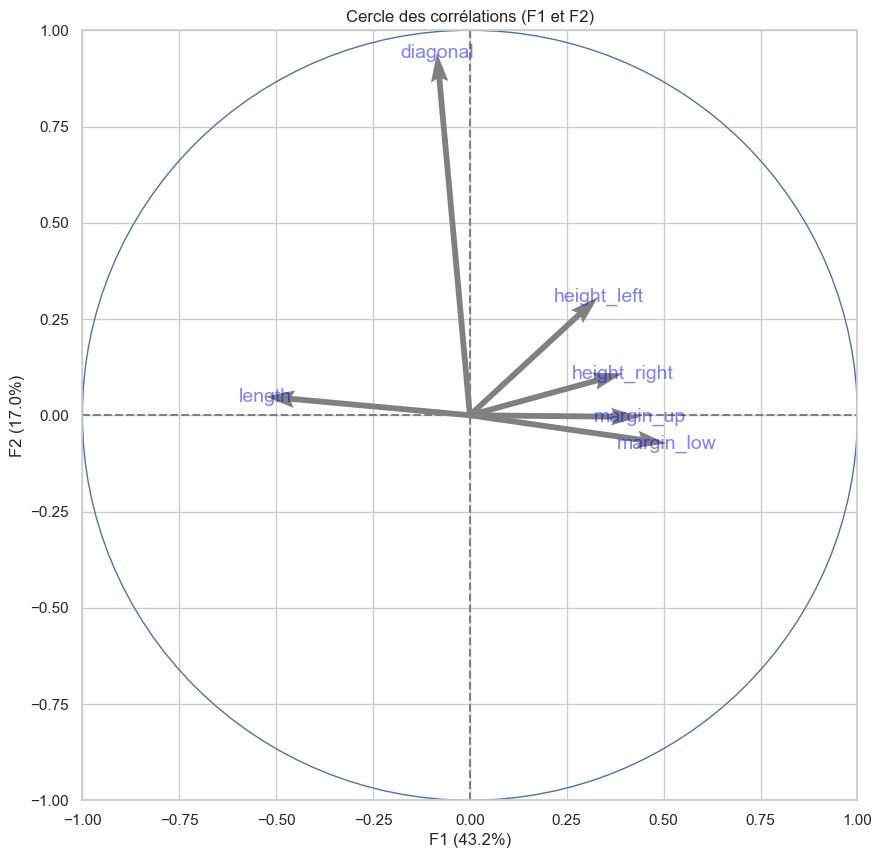

In [59]:
# G√©n√©rer le Cercle des corr√©lations F1 et F2.
pcs = pca.components_ 
display_circles(pcs, n_comp, pca, [(0,1)], labels = np.array(X.columns))

**- Avec le cercle des corr√©lations F1-F2 (la projection de la fl√®che sur F1 correspond au coefficient de corr√©lation ), on peut trouver des variables qui sont bien corr√©l√©es aux composantes principales:**  
- Les variables les plus corr√©l√©es positivement √† F1 sont 'height' et 'margin'
- Les variables les plus corr√©l√©es  n√©gativement √† F1 est 'length'
- Les variables les plus corr√©l√©es positivement √† F2 est 'diagonal'

# Algorithmes Kmeans & R√©gr√©ssion Logistique 

## Split d√©s donn√©es

Avec la fonction 'train_test_split' on d√©coupe nos donn√©es en deux parties :   
80% pour l'entrainement du mod√®le  
20% pour les tests

In [118]:
# Base d'apprentissage et base de test

#valeurs caract√©ristiques et valeur cible
X = billets[['diagonal', 'height_left', 'height_right', 'margin_low', 'margin_up','length']].values
y = billets['is_genuine']
y=y.astype('int')


#fraction de la df 
X_train, X_test, y_train, y_test = train_test_split(X, y,train_size=0.75,random_state=40,stratify = y)

In [120]:
X_test.shape

(375, 6)

In [121]:
y_test.shape

(375,)

In [122]:
X_train.shape

(1125, 6)

**On va entrainner le model sur 80% des donn√©es et faire les tests sur 20%.**

## K-means  

L'algorithme K-means est une technique de clustering largement utilis√©e en apprentissage automatique et en analyse de donn√©es. 
L'objectif du K-means est de diviser un ensemble de donn√©es en groupes (clusters) en fonction de leurs similarit√©s.   
Chaque cluster est caract√©ris√© par son centro√Øde, qui est la moyenne des observations dans le cluster.

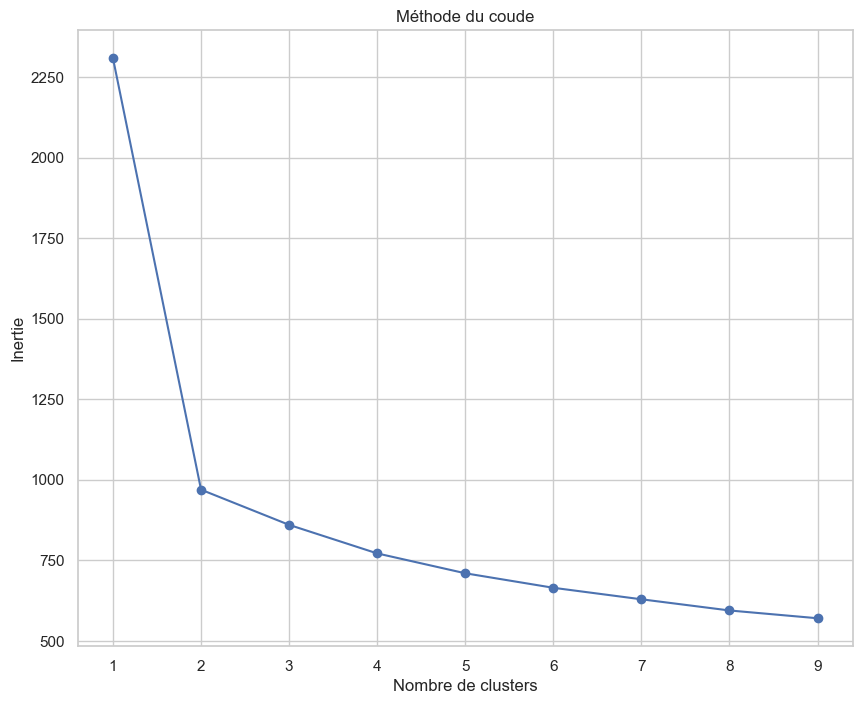

In [123]:
# effectuer une classification par K-mean

#initialiser une liste vide appel√©e "inertias" qui sera utilis√©e pour stocker les valeurs d'inertie pour chaque cluster
inertias = []
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, random_state=40)
    kmeans.fit(X)
    inertias.append(kmeans.inertia_)

fig, ax = plt.subplots(figsize=(10, 8)) # d√©finit la taille de la figure
plt.plot(range(1, 10), inertias, marker='o')
plt.title("M√©thode du coude")
plt.xlabel("Nombre de clusters")
plt.ylabel("Inertie")
plt.show()

### Le clustering se fera sur les pr√©dictions

In [124]:
# Nombre de clusters souhait√©s
n_clusters = 2

In [125]:
# Clustering par K-means
kmeans = KMeans(random_state=40, n_clusters=2, n_init=10)

In [126]:
# entrainement du kmeans sur X_train
kmeans.fit(X_train)

KMeans(n_clusters=2, n_init=10, random_state=40)

In [127]:
# Cr√©ation du df de pr√©duction Kmeans
pred_km = kmeans.predict(X_test)
pred_km = abs(pred_km-1)
pred_km

array([0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0,
       1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1,
       0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1,
       0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1,
       1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0,
       0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1,
       1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0,
       1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1,

In [128]:
# Calcul des centro√Ødes
centroids = scaler.transform(kmeans.cluster_centers_)
centroids

array([[ 0.10122158, -0.26214854, -0.32316393, -0.54011036, -0.42438089,
         0.59751052],
       [-0.21434522,  0.52193956,  0.69009121,  1.14241074,  0.86139485,
        -1.28197424]])

### Projection des individus sur le plan factoriel F1 et F2 par cluster

In [129]:
# Fit the model with the data
X_reduced = pca.transform(scaler.transform(X_test))

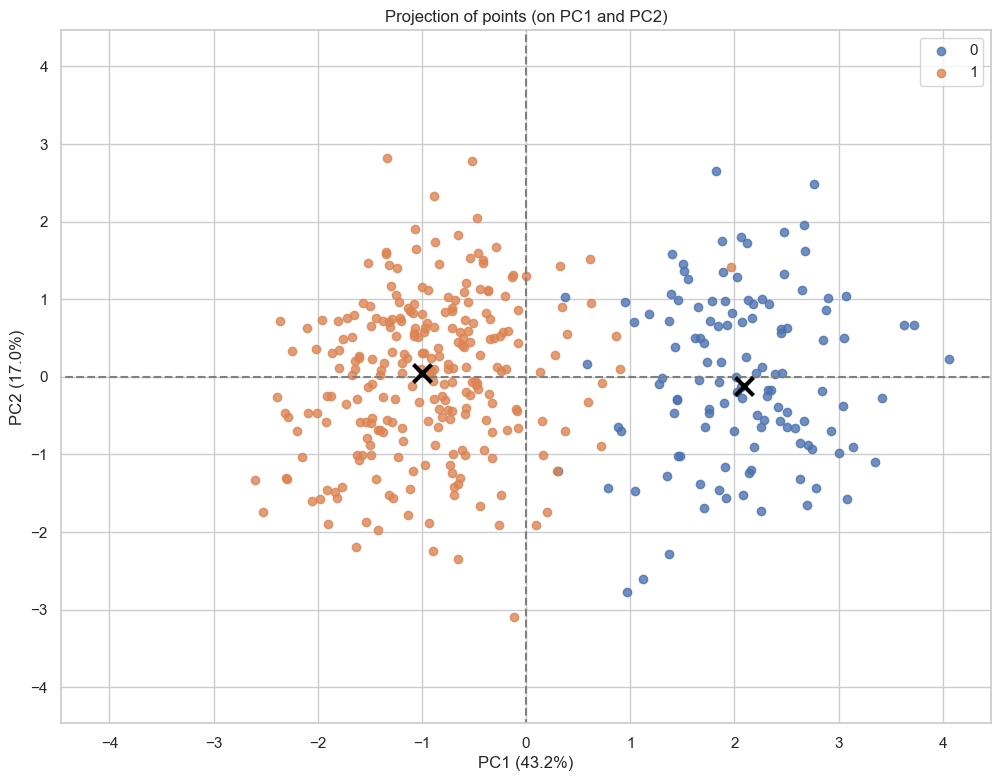

In [130]:
# graphique de la projection et des centroides
centres_reduced = pca.transform(centroids)
plt.figure(figsize=(12,9))
display_factorial_planes(X_reduced, 2, pca, [(0,1)], 
                         illustrative_var = pred_km, alpha = 0.8)
plt.scatter(centres_reduced[:, 0], centres_reduced[:, 1],
            marker='x', s=169, linewidths=3,
            color='black', zorder=10)
plt.show()

### Matrice de confusion K- means

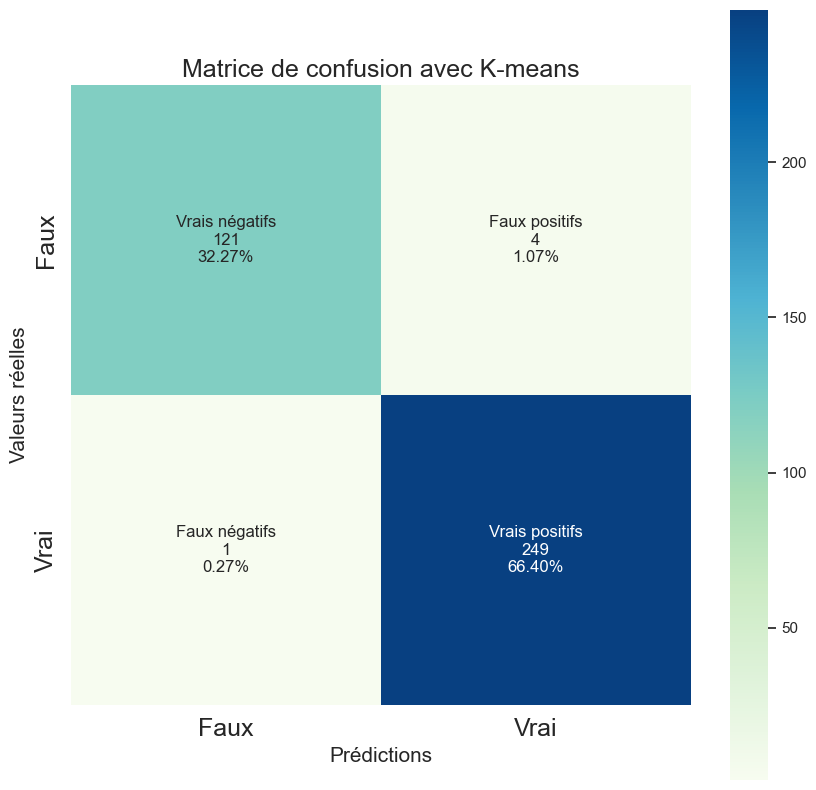

In [131]:
# confusion matrix
matrix_km = confusion_matrix(y_test, pred_km)

names = ['Vrais n√©gatifs','Faux positifs','Faux n√©gatifs','Vrais positifs']
counts = ['{0:0.0f}'.format(value) for value in
                matrix_km.flatten()]
pourcentages = ['{0:.2%}'.format(value) for value in
                     matrix_km.flatten()/np.sum(matrix_km)]
labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in
          zip(names,counts,pourcentages)]
labels = np.asarray(labels).reshape(2,2)

plt.figure(figsize=(10,10))
axes = sns.heatmap(matrix_km, square=True, annot=labels, annot_kws={"size": 12}, fmt='',
                   cmap=plt.cm.GnBu)

class_label = ['Faux', 'Vrai']
axes.set_xlabel('Pr√©dictions', size = 15)
axes.set_ylabel('Valeurs r√©elles', size = 15)
axes.set_xticklabels(class_label, size=18)
axes.set_yticklabels(class_label, size=18)
axes.set_title('Matrice de confusion avec K-means', size=18)

plt.show()

In [145]:
# Vrai positif est un r√©sultat correct qui confirme la pr√©sence.
# Vrai n√©gatif est un r√©sultat correct qui confirme l'absence.

# Faux positif indique quelque chose qui n'est pas pr√©sent.
# Faux n√©gatif indique l'absence de quelque chose qui est r√©ellement pr√©sent. 

Vrais positifs : 249  / 66.40%  
Vrais n√©gatifs : 121 / 32.27 %  
Faux positifs : 4 / 1.07%    
Faux n√©gatifs : 1  / 0.27%  

Donc nous avons 4 vrais billets d√©tect√©s comme un faux, et 1 faux billet d√©tect√© comme vrai billet.

In [132]:
matrix_km

array([[121,   4],
       [  1, 249]], dtype=int64)

### Classification report

In [133]:
# √©valuer la performance du mod√®l Kmeans

In [146]:
print(classification_report(y_test,pred_km))

              precision    recall  f1-score   support

           0       0.99      0.97      0.98       125
           1       0.98      1.00      0.99       250

    accuracy                           0.99       375
   macro avg       0.99      0.98      0.98       375
weighted avg       0.99      0.99      0.99       375



Le rapport  nous aide √† mieux comprendre comment on √©t√© interpr√©t√©s les r√©sultats obtenus.   
On observe d'ailleurs une exactitude des r√©sultats √† hauteur de 98% (accuracy).  
("Accuracy score" est utilis√© pour mesurer les performances du mod√®le en termes de ratio de la somme des vrais positifs et des vrais n√©gatifs sur l'ensemble des pr√©dictions effectu√©es.)

### R√©alisation du KNN ( le plus proche voisin)

In [76]:
from sklearn.neighbors import KNeighborsClassifier as Knn
from sklearn import neighbors

In [77]:
# Cr√©ation du mod√®le
KNN = Knn().fit(X_train,y_train)
y_pred_knn = KNN.predict(X_test)

In [78]:
# Pr√©diction
y_pred_knn = KNN.score(X_test,y_test)
print(y_pred_knn)

0.9946666666666667


In [79]:
print((y_pred_knn)*100,'%')

99.46666666666667 %


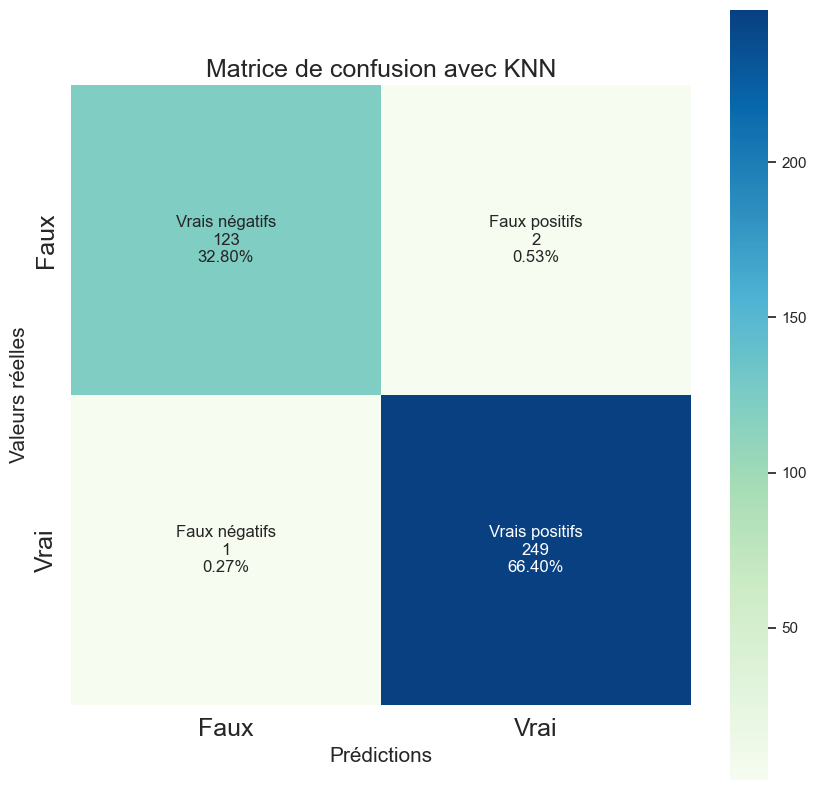

In [158]:
# confusion KNN
matrix_knn = confusion_matrix(y_test, KNN.predict(X_test))

names = ['Vrais n√©gatifs','Faux positifs','Faux n√©gatifs','Vrais positifs']
counts = ['{0:0.0f}'.format(value) for value in
                matrix_knn.flatten()]
pourcentages = ['{0:.2%}'.format(value) for value in
                     matrix_knn.flatten()/np.sum(matrix_km)]
labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in
          zip(names,counts,pourcentages)]
labels = np.asarray(labels).reshape(2,2)

plt.figure(figsize=(10,10))
axes = sns.heatmap(matrix_knn, square=True, annot=labels, annot_kws={"size": 12}, fmt='',
                   cmap=plt.cm.GnBu)

class_label = ['Faux', 'Vrai']
axes.set_xlabel('Pr√©dictions', size = 15)
axes.set_ylabel('Valeurs r√©elles', size = 15)
axes.set_xticklabels(class_label, size=18)
axes.set_yticklabels(class_label, size=18)
axes.set_title('Matrice de confusion avec KNN', size=18)

plt.show()

Vrais positifs : 240  / 64.00%  
Vrais n√©gatifs : 133 / 35.47 %  
Faux positifs : 2 / 0.53%    
Faux n√©gatifs : 0  / 0.00% 

Donc nous avons 2 vrais billets d√©tect√©s comme un faux, et 0 faux billet d√©tect√© comme vrai billet.

# R√©gression logistique   
  
Technique statistique utilis√©e pour mod√©liser la relation entre une variable d√©pendante binaire (√† deux cat√©gories) et un ensemble de variables ind√©pendantes.  
  
L'objectif de la r√©gression logistique est de mod√©liser, de classifier, une variable binaire prenant ses valeurs dans {0,1} en fonction de variables explicatives quantitatives (et potentiellement qualitatives).

###  Cr√©ation du mod√®l de r√©gression logistique

In [137]:
# alternative proposee 
from sklearn import linear_model
#instanciation du mod√®le
model_logit = linear_model.LogisticRegression(random_state = 40,solver='liblinear')

#training
model_logit.fit(X_train,y_train)

#pr√©cision du mod√®le
pred_logi = model_logit.score(X_test,y_test)
print(pred_logi*100)

98.66666666666667


### Pr√©dictions

In [138]:
# Cr√©ation du df de pr√©duction logistique
pred_logi = model_logit.predict(X_test)
pred_proba = model_logit.predict_proba(X_test)[:,1]

In [139]:
pred_proba.round(2)

array([0.  , 0.97, 0.9 , 0.99, 1.  , 1.  , 1.  , 1.  , 0.99, 0.98, 0.  ,
       0.98, 0.98, 1.  , 0.99, 0.33, 0.  , 0.  , 1.  , 0.98, 0.99, 0.01,
       1.  , 0.99, 0.  , 0.03, 0.82, 0.96, 0.  , 1.  , 0.96, 0.  , 0.97,
       0.99, 1.  , 0.99, 1.  , 0.  , 0.99, 0.97, 0.99, 0.97, 0.02, 0.  ,
       1.  , 1.  , 0.99, 1.  , 0.97, 0.99, 1.  , 0.  , 1.  , 0.  , 1.  ,
       0.  , 1.  , 1.  , 1.  , 0.99, 0.  , 1.  , 1.  , 0.86, 0.01, 0.99,
       0.  , 0.89, 0.  , 1.  , 0.94, 1.  , 1.  , 0.  , 1.  , 1.  , 0.75,
       1.  , 0.97, 1.  , 0.98, 0.99, 0.02, 0.75, 0.  , 1.  , 1.  , 0.98,
       0.  , 0.01, 0.99, 1.  , 0.99, 1.  , 1.  , 0.09, 0.02, 0.03, 0.41,
       0.99, 0.  , 1.  , 0.99, 1.  , 0.  , 0.  , 1.  , 0.21, 0.97, 0.14,
       0.  , 1.  , 0.02, 0.99, 0.93, 1.  , 0.  , 0.06, 0.99, 0.  , 0.99,
       0.28, 0.  , 0.  , 0.99, 0.97, 0.99, 0.  , 0.01, 0.99, 0.05, 1.  ,
       1.  , 1.  , 0.  , 0.  , 1.  , 0.99, 1.  , 1.  , 0.  , 0.97, 1.  ,
       0.98, 0.99, 0.  , 1.  , 0.99, 1.  , 1.  , 0.

### Matrice de confusion (r√©gression logistique)

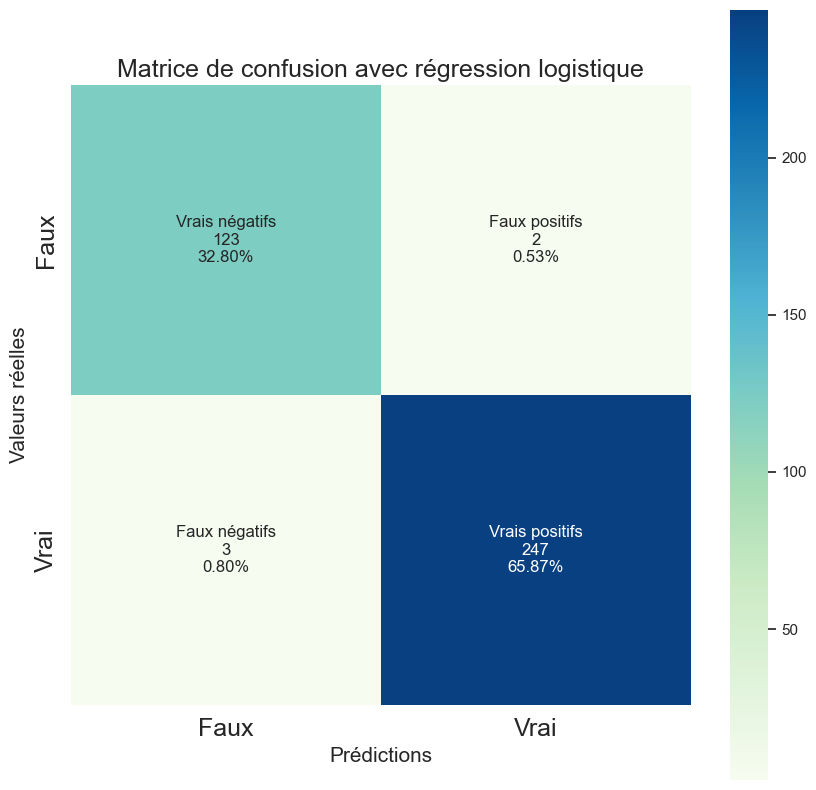

In [140]:
# confusion matrix
matrix_km = confusion_matrix(y_test, pred_logi)

names = ['Vrais n√©gatifs','Faux positifs','Faux n√©gatifs','Vrais positifs']
counts = ['{0:0.0f}'.format(value) for value in
                matrix_km.flatten()]
pourcentages = ['{0:.2%}'.format(value) for value in
                     matrix_km.flatten()/np.sum(matrix_km)]
labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in
          zip(names,counts,pourcentages)]
labels = np.asarray(labels).reshape(2,2)

plt.figure(figsize=(10,10))
axes = sns.heatmap(matrix_km, square=True, annot=labels, annot_kws={"size": 12}, fmt='',
                   cmap=plt.cm.GnBu)

class_label = ['Faux', 'Vrai']
axes.set_xlabel('Pr√©dictions', size = 15)
axes.set_ylabel('Valeurs r√©elles', size = 15)
axes.set_xticklabels(class_label, size=18)
axes.set_yticklabels(class_label, size=18)
axes.set_title('Matrice de confusion avec r√©gression logistique', size=18)

plt.show()

In [144]:
# Vrai positif est un r√©sultat correct qui confirme la pr√©sence.
# Vrai n√©gatif est un r√©sultat correct qui confirme l'absence.

# Faux positif indique quelque chose qui n'est pas pr√©sent.
# Faux n√©gatif indique l'absence de quelque chose qui est r√©ellement pr√©sent. 

Vrais positifs : 239  / 63.73%  
Vrais n√©gatifs : 133 / 35.47 %  
Faux positifs : 2 / 0.53%    
Faux n√©gatifs : 1  / 0.27%  

Donc nous avons 2 vrais billets d√©tect√©s comme un faux, et 3 faux billets d√©tect√©s comme vrais billets.

### classification_report

In [143]:
print(classification_report(y_test,pred_logi))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98       125
           1       0.99      0.99      0.99       250

    accuracy                           0.99       375
   macro avg       0.98      0.99      0.99       375
weighted avg       0.99      0.99      0.99       375



## Conclusion et choix du model

In [106]:
from pandas import Series,DataFrame

In [156]:
df = {'Accuracy': {'K-means':0.99, 'R√©gression logistique': 0.99},
        'Recall':{'K-means':0.97, 'R√©gression logistique': 0.99},
      'f1-score':{'K-means':0.98, 'R√©gression logistique': 0.99}}
score = DataFrame(df)

In [157]:
score

Accuracy  Recall  f1-score
K-means                    0.99    0.97      0.98
R√©gression logistique      0.99    0.99      0.99

###### Les set de donn√©es analys√© contiennent pour les deux algorythmes 400 √©chantillons.
- Regression logistique  
- Kmeans   
 Ils renvoient tous les deux de tr√®s bon resultats mais la pr√©dictions de  vrai faux dans la r√©gr√©ssion logisitique est plus pr√©cise.

## Courbe de ROC

La courbe ROC (Receiver Operating Characteristic) est un outil graphique pour √©valuer les performances d'un mod√®le de classification.  
  
  
Repr√©sentation graphique des performances d'un mod√®le de classification binaire pour tous les seuils de classification

In [94]:
# Calculez la courbe ROC
fpr, tpr, thresholds = roc_curve(y_test, pred_proba)

# Calculez l'aire sous la courbe ROC (AUC)
roc_auc = auc(fpr, tpr)

In [95]:
for fp, tp, th in zip(fpr, tpr, thresholds):
    print("fp : {} - tp : {} - seuil : {}".format(fp.round(2), tp.round(2), th.round(2)))

fp : 0.0 - tp : 0.0 - seuil : inf
fp : 0.0 - tp : 0.0 - seuil : 1.0
fp : 0.0 - tp : 0.95 - seuil : 0.93
fp : 0.01 - tp : 0.95 - seuil : 0.93
fp : 0.01 - tp : 0.99 - seuil : 0.78
fp : 0.01 - tp : 0.99 - seuil : 0.74
fp : 0.01 - tp : 1.0 - seuil : 0.69
fp : 0.04 - tp : 1.0 - seuil : 0.35
fp : 0.04 - tp : 1.0 - seuil : 0.31
fp : 1.0 - tp : 1.0 - seuil : 0.0


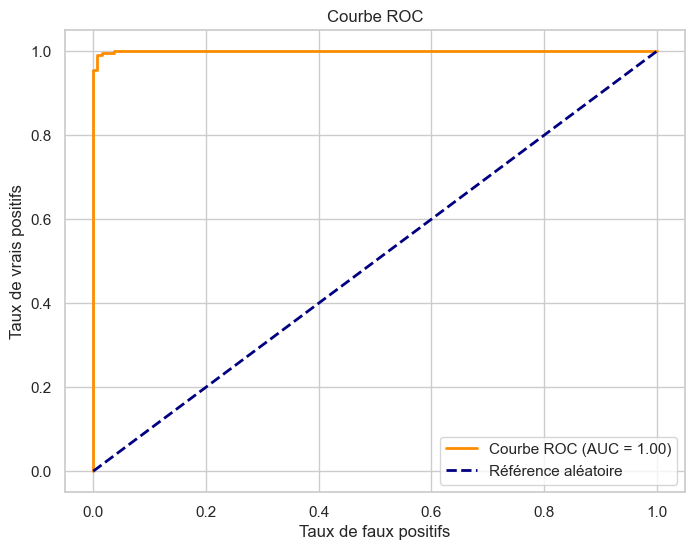

In [96]:
# Affichez la courbe ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='Courbe ROC (AUC = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='R√©f√©rence al√©atoire')
plt.xlabel('Taux de faux positifs')
plt.ylabel('Taux de vrais positifs')
plt.title('Courbe ROC')
plt.legend(loc='lower right')
plt.show()

**Avec un AUC de 1.00 nous avons une tr√©s bonne performance.**

# Enregistrement du model

# Import fichier test
test = pd.read_csv('billets_production.csv')
test.head()

# Je cr√©e une premi√®re fonction qui va me permettre de tester mon fichier avec les deux algorithmes
def test_billet(test) : 
    
    # Je cr√©e une copie 
    X_final = test.iloc[:,:-1]
       
    # J'applique la pr√©diction par regression logistique
    res = model_logit.predict(X_final.values)
    res_proba = model_logit.predict_proba(X_final.values)[:,1]
    
    # Je cr√©e une liste dans laquelle j'indique que si la valeur de i est sup√©rieure √† 0.78 il prendra la valeur de True
    predict=[]
    for i in res_proba:
        if i >= 0.78 : predict.append(True)
        else : predict.append(False)
    
    # Je cr√©e un colonne qui affiche la pr√©diction en % et une autre qui affiche la r√©ponse
    test["prediction_% relog"]=res_proba
    test["R√©ponse reglog"]=predict  

    return(test[["id", "prediction_% relog", "R√©ponse reglog"]].set_index('id'))

print(test_billet(test))